In [2]:
#import thu vien
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/food_classification/train'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/food_classification/test'

In [19]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 99 images belonging to 10 classes.
Found 99 images belonging to 10 classes.


In [20]:
train_dataset.class_indices

{'Banhbao': 0,
 'Banhmi': 1,
 'Banhran': 2,
 'Banhuot': 3,
 'Bapxao': 4,
 'Bunbo': 5,
 'Comtam': 6,
 'Xoigac': 7,
 'banhtet': 8,
 'banhxeo': 9}

In [21]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [23]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [24]:
history = model.fit(train_dataset,batch_size=32,epochs=65,verbose=1,validation_data=validation_dataset)

Epoch 1/65
10/10 [==============================] - 27s 3s/step - loss: 2.4311 - accuracy: 0.0707 - val_loss: 2.2491 - val_accuracy: 0.1212
Epoch 2/65
10/10 [==============================] - 1s 129ms/step - loss: 2.2019 - accuracy: 0.2222 - val_loss: 2.1033 - val_accuracy: 0.2323
Epoch 3/65
10/10 [==============================] - 1s 125ms/step - loss: 2.0702 - accuracy: 0.1919 - val_loss: 1.7885 - val_accuracy: 0.4343
Epoch 4/65
10/10 [==============================] - 1s 122ms/step - loss: 1.8343 - accuracy: 0.2929 - val_loss: 1.7024 - val_accuracy: 0.3535
Epoch 5/65
10/10 [==============================] - 1s 129ms/step - loss: 1.9000 - accuracy: 0.3232 - val_loss: 1.5450 - val_accuracy: 0.4646
Epoch 6/65
10/10 [==============================] - 1s 127ms/step - loss: 1.6445 - accuracy: 0.3737 - val_loss: 1.5169 - val_accuracy: 0.4343
Epoch 7/65
10/10 [==============================] - 1s 133ms/step - loss: 1.5006 - accuracy: 0.4747 - val_loss: 1.2804 - val_accuracy: 0.4747
Epoch 8/

In [25]:
model.save('/content/drive/MyDrive/food_classification/food_classification.h5')

In [28]:
foodclassification_model = load_model('/content/drive/MyDrive/food_classification/food_classification.h5')

In [29]:
score=foodclassification_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

10/10 [==============================] - 1s 43ms/step - loss: 0.0011 - accuracy: 1.0000
Test loss =  0.0010746759362518787
Test accuracy =  1.0


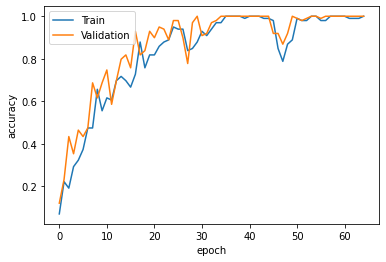

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

đây là món:  Bapxao


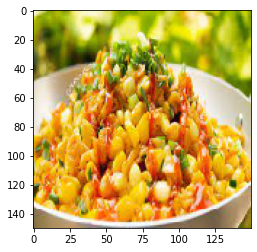

In [32]:
img = load_img('/content/drive/MyDrive/food_classification/Predict/1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhmi',
 'Banhran',
 'Banhuot',
 'Bapxao',
 'Bunbo',
 'Comtam',
 'Xoigac',
 'banhtet',
 'banhxeo']
print('đây là món: ',Label[int(np.argmax(foodclassification_model.predict(img),axis=-1))])

đây là món:  Bunbo


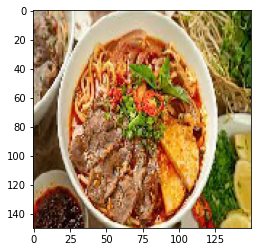

In [33]:
img = load_img('/content/drive/MyDrive/food_classification/Predict/4.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhmi',
 'Banhran',
 'Banhuot',
 'Bapxao',
 'Bunbo',
 'Comtam',
 'Xoigac',
 'banhtet',
 'banhxeo']
print('đây là món: ',Label[int(np.argmax(foodclassification_model.predict(img),axis=-1))])

đây là món:  Xoigac


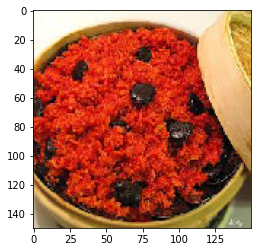

In [34]:
img = load_img('/content/drive/MyDrive/food_classification/Predict/8.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhmi',
 'Banhran',
 'Banhuot',
 'Bapxao',
 'Bunbo',
 'Comtam',
 'Xoigac',
 'banhtet',
 'banhxeo']
print('đây là món: ',Label[int(np.argmax(foodclassification_model.predict(img),axis=-1))])

In [35]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('food_classification.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-24 16:33:32--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-24 16:33:33 (32.4 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/food_classification.ipynb to pdf
[NbConvertApp] Support files will be in food_classification_files/
[NbConvertApp] Making directory ./food_classification_files
[NbConvertApp] Ma

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'